# Analyse des données du cancer de sein (Wisconsin Cancer)
## Partie II - Exploration des données

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Récupération des données 

In [8]:
cancer = pd.read_csv('data/cleaned_data.csv',sep=",")


Nous allons explorer les données, après avoir identifié que les deux variables 'smoothness_mean' et 'compactness_mean' étaient de forts indicateurs, nous allons donc nous concentrer sur d'autres variables dans ce notebook. Nous allons utiliser des boîtes à moustaches puis des pairplots ou bigraphes.

### Boîtes à moustaches 


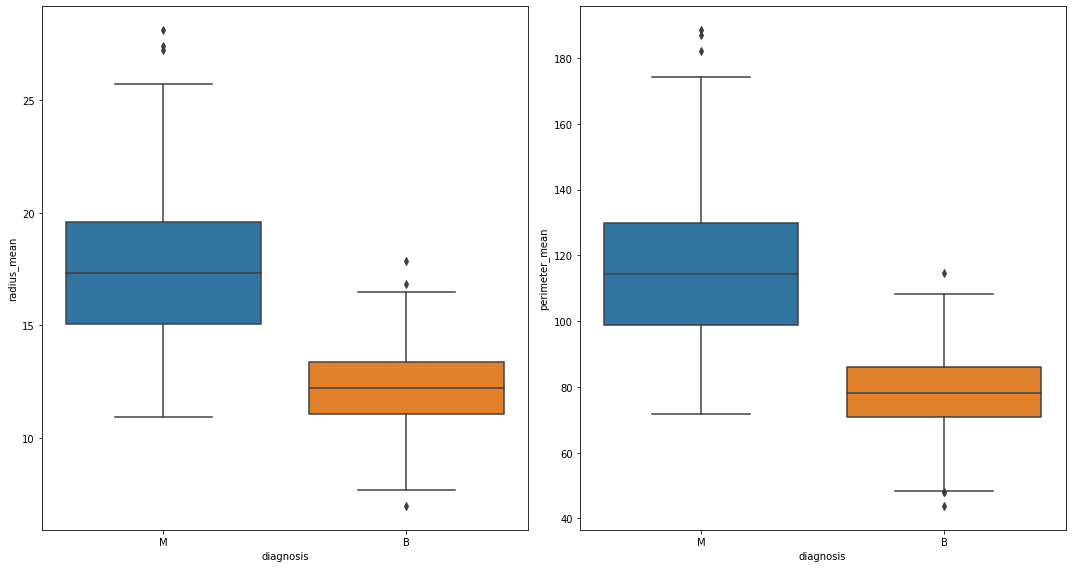

In [15]:
fig, axe = plt.subplots(figsize=(15,8), nrows=1, ncols=2)

sns.boxplot(x='diagnosis', y='radius_mean', data=cancer, ax=axe[0])
sns.boxplot(x='diagnosis', y='perimeter_mean', data=cancer, ax=axe[1])

plt.tight_layout();

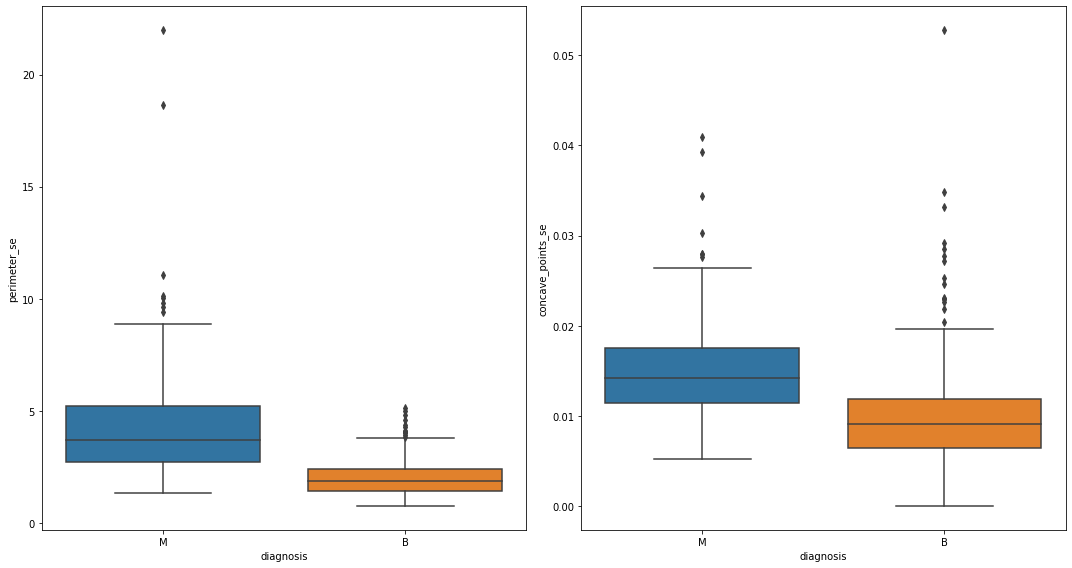

In [21]:
fig, axe = plt.subplots(figsize=(15,8), nrows=1, ncols=2)

sns.boxplot(x='diagnosis', y='perimeter_se', data=cancer, ax=axe[0])
sns.boxplot(x='diagnosis', y='concave_points_se', data=cancer, ax=axe[1])

plt.tight_layout();

Les boites à moustaches ci-dessous montrent clairement que la distribution des variables pour les cas B et M diffèrent.

Dans le deuxième exemple des boîtes à moustache :
la moyenne du perimiter_se est clairement plus élevé pour les diagnostics malignes que pour les diagnostics bénignes.
En effet, le 1er quartile pour les cas malignes est au dessus de 75% des valeurs des cas des bénignes; ce qui est non négligeable.

### Pairplots/Graphes à deux variables (deux à deux)

Cette technique est efficace, car on regarde toutes les relations entre toutes les variables.

In [29]:
# On définit des groupes selon la classe et le type de variable

group_rad = ['radius_mean', 'radius_se', 'radius_worst']
group_per = ['perimeter_mean','perimeter_se', 'perimeter_worst']
group_are = ['area_mean', 'area_se', 'area_worst']
group_tex = ['texture_mean', 'texture_se', 'texture_worst']
group_smo = ['smoothness_mean', 'smoothness_se','smoothness_worst', 
           'compactness_mean', 'compactness_se','compactness_worst']
group_con = ['concavity_mean', 'concavity_se','concavity_worst',
           'concave_points_mean', 'concave_points_se','concave_points_worst']
group_sym = ['symmetry_mean', 'symmetry_se','symmetry_worst', 
           'fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst']

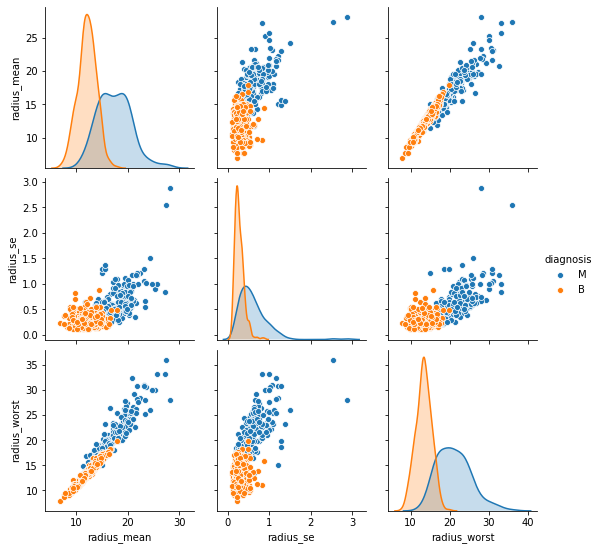

In [30]:
sns.pairplot(data=cancer, vars=group_rad, hue='diagnosis');

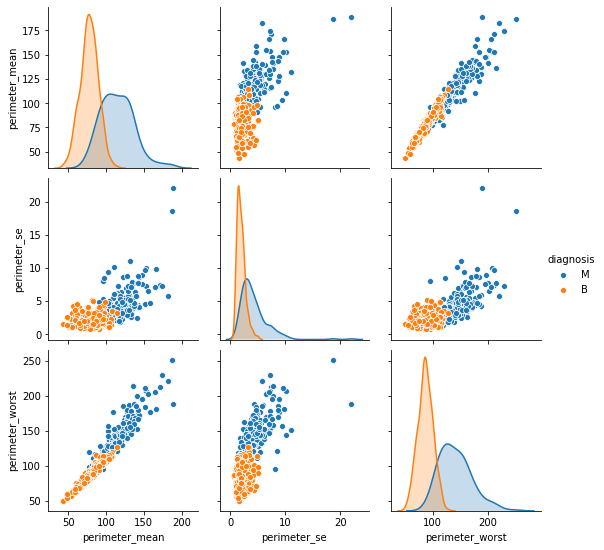

In [40]:
sns.pairplot(data=cancer, vars=group_per, hue='diagnosis');

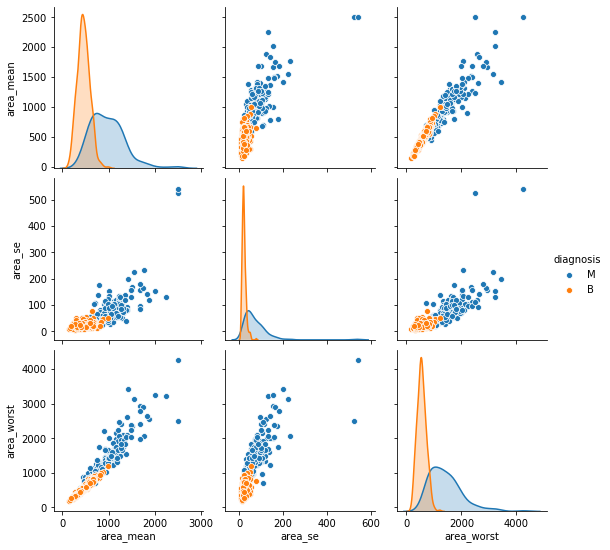

In [39]:
sns.pairplot(data=cancer, vars=group_are, hue='diagnosis');

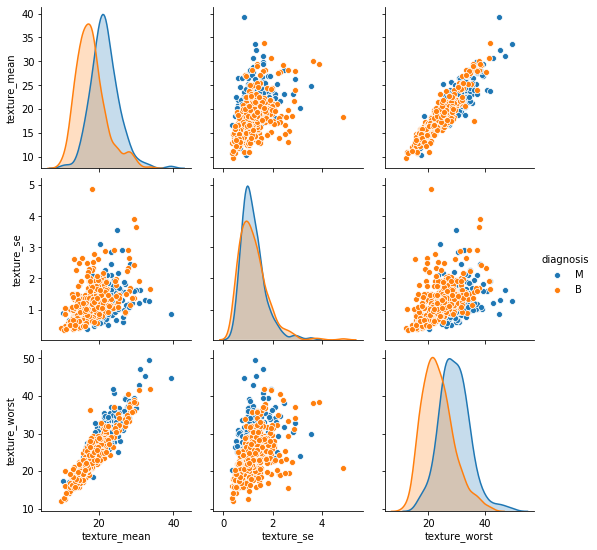

In [38]:
sns.pairplot(data=cancer, vars=group_tex, hue='diagnosis');

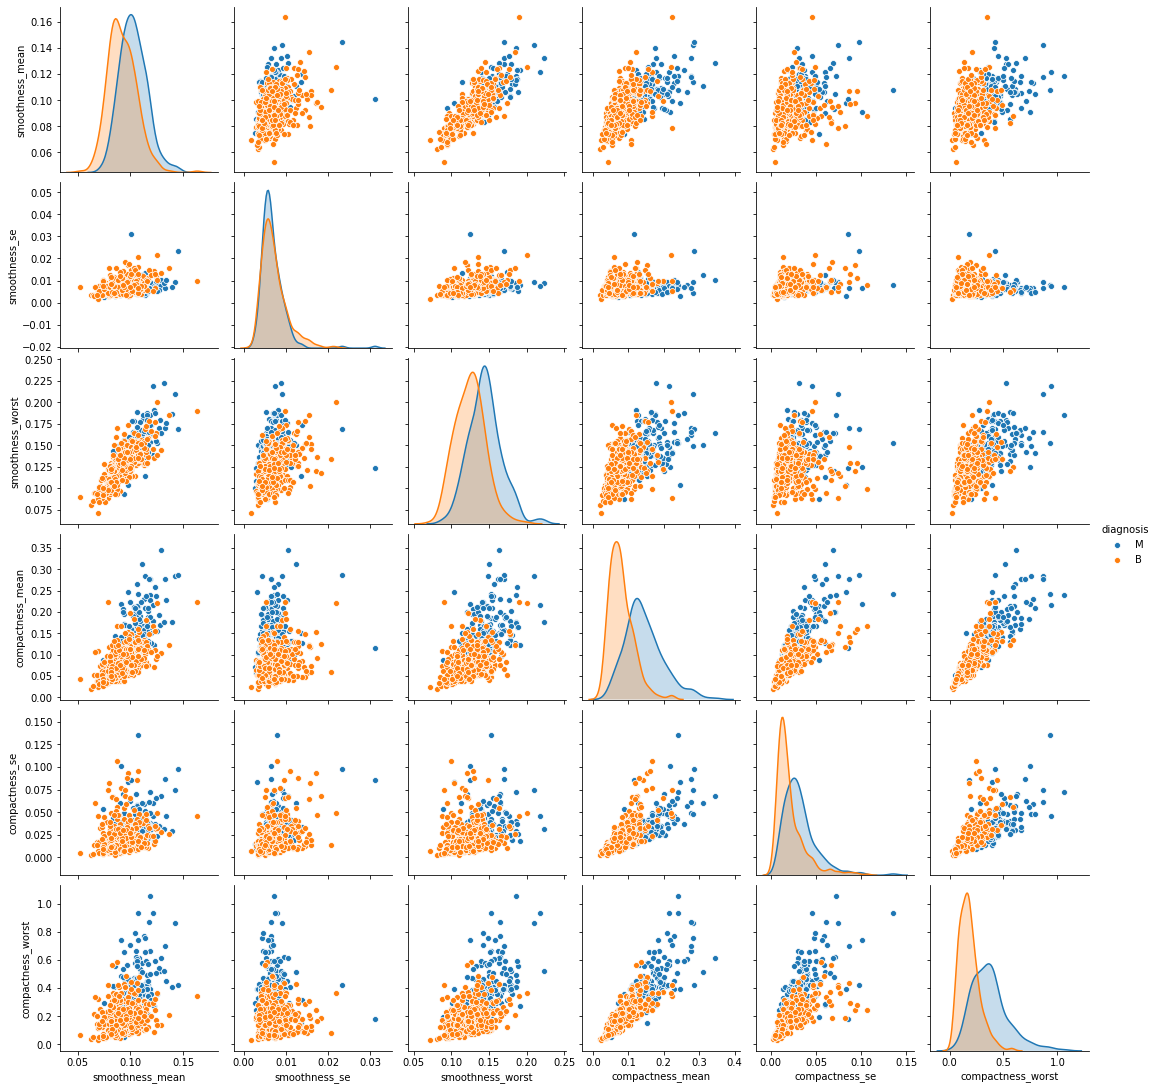

In [37]:
sns.pairplot(data=cancer, vars=group_smo, hue='diagnosis');

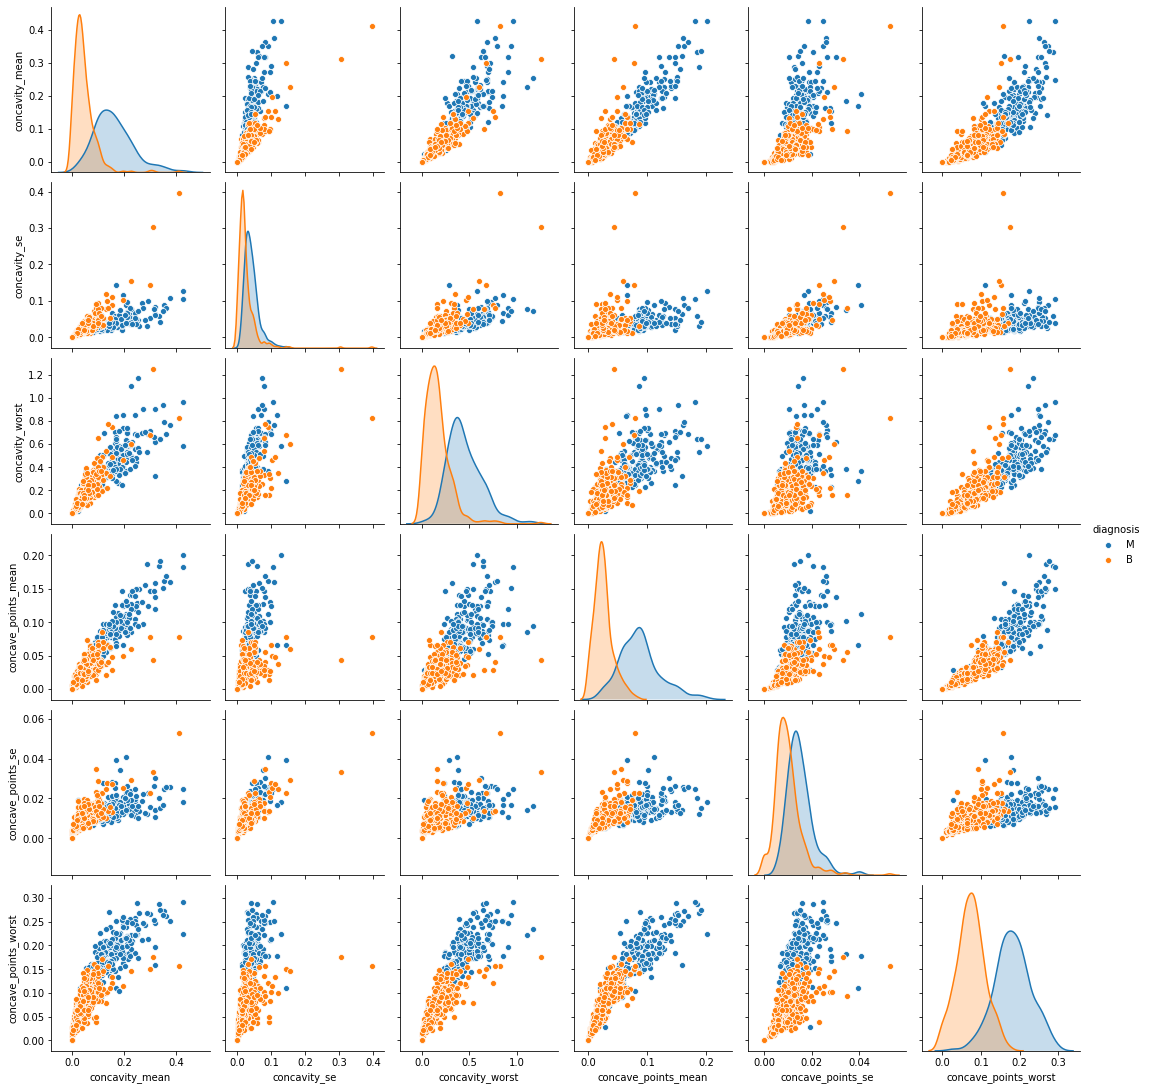

In [36]:
sns.pairplot(data=cancer, vars=group_con, hue='diagnosis');

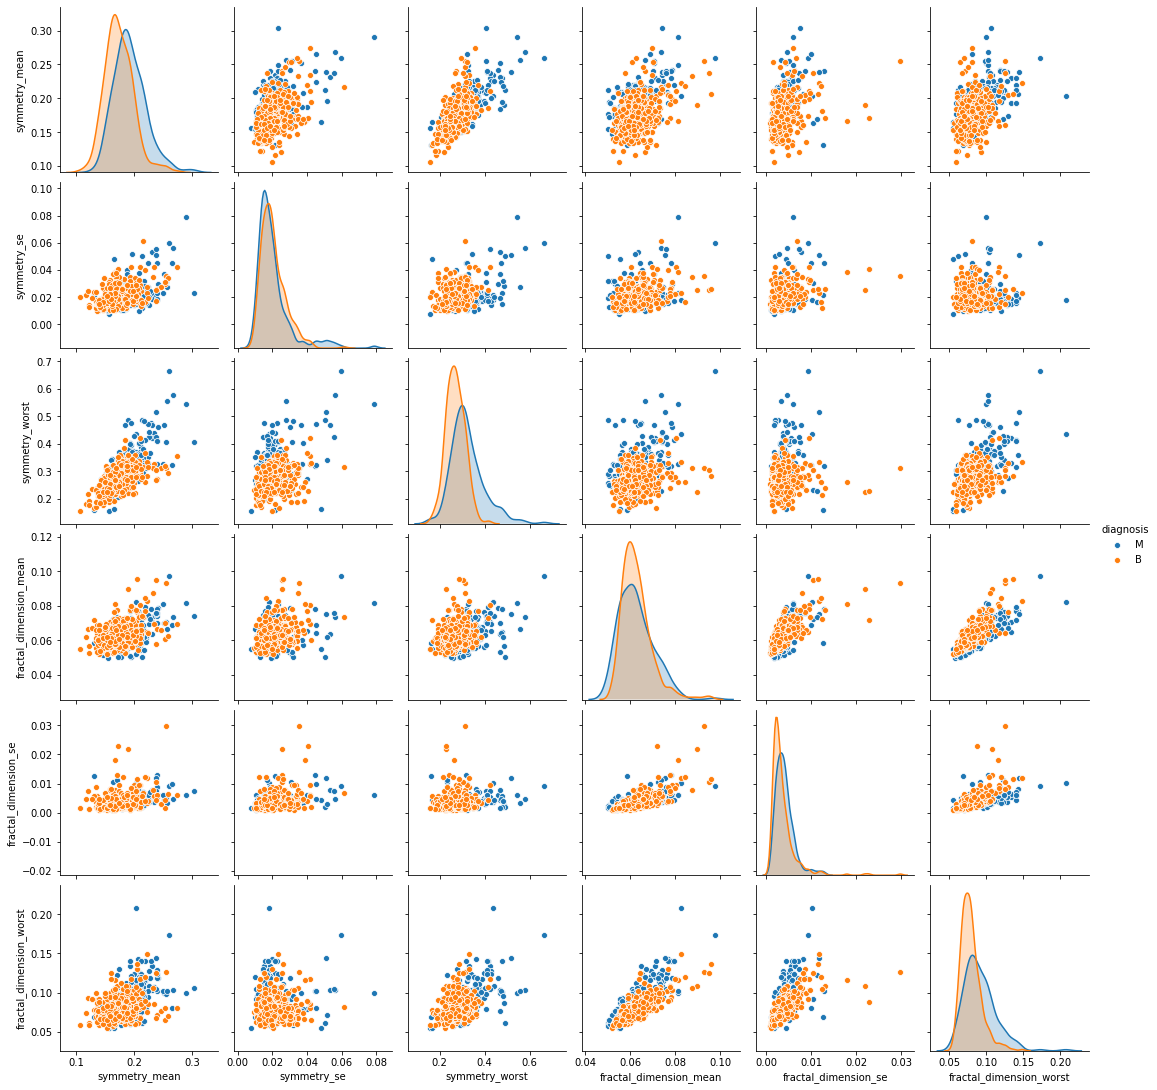

In [32]:
sns.pairplot(data=cancer, vars=group_sym, hue='diagnosis');

#### Observations
* Grâce aux pairplots, on remarque qua dans chaque groupe les variables sont corrélées, donc il suffit de séléctionner une variable par groupe. 

* Grâce aux études précédantes faites sur les corrélations des variables de notre dataset. nous allons donc utiliser cette liste des features pour le modeling qu'on va faire sur la dernière partie de ce projet (modeling.ipynb)


In [27]:
features_model = ['diagnosis','texture_mean', 'area_mean', 'compactness_mean', 'symmetry_mean','fractal_dimension_mean']

cleaned_cancer_data = cancer[features_model]

cc = cleaned_cancer_data.to_csv('data/simplified_data.csv') # Comme ca on lit directement ce fichier dans 'modeling.ipynb'


## Analyse en composantes principales (PCA)

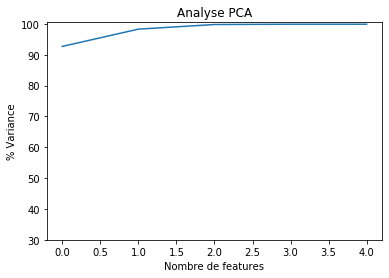

In [35]:
from sklearn.decomposition import PCA

x = cancer.drop(columns='diagnosis')

pca = PCA(5,random_state = 0) # 5 composantes
pca.fit(x)
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% Variance')
plt.xlabel('Nombre de features')
plt.title('Analyse PCA')
plt.ylim(30,100.5)

plt.plot(var)
plt.show()

Effectivement, l'analyse en composantes principales montre que notre analyse précédante sur la corrélation des variables est correcte. Ou du moins proche de la réalité.